<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Basic_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Linear Regression
  * Normal Equation
* Gradient Descent
  * Batch Gradient Descent
  * Stochastic Gradient Descent
  * Mini-batch Gradient Descent
* Regularized Linear Models  
  * Polynomial Regression
  * Ridge Regression
  * Lasso Regression
  * Elastic Net
* Logistic Regression
 * Softmax Regression

In [7]:
%matplotlib inline

In [8]:
# creates the images/training_linear_models folder (if it doesn't already exist), 
# and define the save_fig() function which is used through this notebook to save the figures in high-res
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
# define the default font sizes to make the figures prettier
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Common Machine Learning Notations

* $m$ is number of `instances` (`training examples`) in the dataset

* $n$ is number of `features` in the dataset

* $\textbf{x}^{(i)}$ is a vector of all the feature values (excluding the label) of the $i$-th instance in the dataset, and $y^{(i)}$ is its label (the desired output value for that instance):


$$\textbf{x}^{(i)}=\begin{bmatrix}
x_1^{(i)}\\
x_2^{(i)}\\
\vdots\\
x_n^{(i)}
\end{bmatrix} $$

* $\textbf{X}$ is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row for instance, and the $i$-th row is equal to the transpose of $\textbf{x}^{(i)}$, denoted $(\textbf{x}^{(i)})^\top$:

$$\textbf{X}=\begin{bmatrix}
\textbf{x}^{(1)})^\top\\
\textbf{x}^{(2)})^\top\\
\vdots\\
\textbf{x}^{(m)})^\top
\end{bmatrix} = \begin{bmatrix}
x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)}\\
x_1^{(2)} & x_2^{(2)} &  \ldots & x_n^{(2)}\\
 \vdots   & \vdots    &  \ldots &  \vdots  \\
x_1^{(m)} & x_2^{(m)} &  \ldots &  x_n^{(m)}
\end{bmatrix}$$

* $h_{\theta}$ is the hypothesis function (your system's prediction function). When your system is given an instance's feature vector $\textbf{x}^{(i)}$, it outputs a predicted value 
$$ \widehat{y}^{(i)}= h(\textbf{x}^{(i)})$$






# Multiple Linear Regression model


$$\widehat{y}  = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

* $x_i$ = the $i$-th feature value

* $\widehat{y}$ is the predicted value

* $\theta_j$ = the $j$-th parameter 
 * $\theta_0$ = the bias term
 * $\theta_1, \ldots, \theta_n$ = the feature weights


  $\star$ As dot product: 

 $$\widehat{y}  = h_{\mathbf{\theta}}(\mathbf{x})=\mathbf{\theta} \cdot \mathbf{x}$$ 

  $\star$ As matrix multiplication: $$\widehat{y} = \mathbf{\theta}^\top \mathbf{x}$$ 

*  $\mathbf{\theta}= \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots\\
\theta_n
\end{bmatrix}$ is the parameter vector

*  $\mathbf{x} = \begin{bmatrix}
1\\
x_1\\
\vdots\\
x_n
\end{bmatrix}$ is the instance's feature vector

## Root Mean Square Error (RMSE)

Note that here $\textbf{X}$ denotes the matrix containing all the feature values (excluding labels) of all instances in the dataset. The most common performance measure of a regression model is the `Root Mean Square Error (RMSE)`:

$$RMSE(X, h_{\mathbf{\theta}})=\sqrt{\small\frac{1}{m} \sum_{i=1}^m \left(h_{\mathbf{\theta}}(\mathbf{x}^{(i)})-y^{(i)}\right)^2} = \sqrt{\small\frac{1}{m} \sum_{i=1}^m \left(\mathbf{\theta}^\top \mathbf{x}^{(i)}-y^{(i)}\right)^2} = 
\sqrt{MSE}$$

To train a Linear Regression model, we need to find the value of $\Theta$ that minimizes the `RMSE`. In practice, since the value that minimizes a function also minimizes its square root, it is simpler to minimize the `Mean Square Error (MSE)`.

Even though the `RMSE` (or `MSE`) is generally the preferred performance emasure for regression tasks, in some contexts another function might be preferred. For example, if there are many outliers, you may consider using the `mean absolute error (MAE)`:

$$MAE(X, h)= \frac{1}{m} \sum_{i=1}^m \lvert h(x^{(i)})-y^{(i)}\rvert$$



## Norms

Both the `RMSE` and the `MAE` are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

Various distance measures, or **norms**, are possible:

* Computing the root of a sum of squares (`RMSE`) corresponds to the **Euclidean norm**; it is also called the $l_2$ norm, denoted $\lVert \cdot \rVert_2$ (or just $\lVert \cdot \rVert$).

* Computing the sum of absolute values (`MAE`) corresponds to the $l_1$ norm, denoted $\lVert \cdot \rVert_1$. This is sometimes called the **Manhattan** norm beceause it measures the distance between two points in a city if you can travel along orthogonal city blocks.

* In general, the $l_k$ norm of a vector $\vec{v}=\begin{bmatrix}
v_1\\
v_2\\
\vdots\\
v_n
\end{bmatrix}$ is given by:

$$ \lVert \vec{v} \rVert_k = \left( | v_0 |^k + | v_1 |^k + \ldots + | v_n |^k \right)^{\frac{1}{k}}$$

Note that $l_0$ gives the number of nonzero elements and $l_{\infty}$ gives the maximum absolute value in the vector.

**The higher the norm index, the more it focuses on large values and neglects small ones.** That means, `RMSE` is more sensitive to outliers than the `MAE`. When outliers are exponentially rare (like in a bell-shaped curve), the `RMSE` performs very well and is generally prefered.



## The Normal Equation

The normal equation gives a closed-form solution to find the value of $\mathbf{\theta}$ that minimizes the cost function:

$$ \widehat{\mathbf{\theta}} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}$$

* $\widehat{\mathbf{\theta}}$ is the value of $\mathbf{\theta}$ that minimizes the cost function
* $\mathbf{y} = \begin{bmatrix}
y^{(1)}\\
\vdots\\
y^{(m)}
\end{bmatrix}$ is the vector of target values

**Warning.** The normal equation might not work if the matrix $\mathbf{X}^\top \mathbf{X}$ is not invertible, such as if $m < n$ or if some features are redundant.


Note that $$\mathbf{X} \mathbf{\theta} = \begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)}\\
1 & x_1^{(2)} & x_2^{(2)} &  \ldots & x_n^{(2)}\\
\vdots & \vdots   & \vdots    &  \ldots &  \vdots  \\
1 & x_1^{(m)} & x_2^{(m)} &  \ldots &  x_n^{(m)}
\end{bmatrix} \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots\\
\theta_n
\end{bmatrix} = \begin{bmatrix}
\theta_0 + \theta_1 x_1^{(1)} + \theta_2 x_2^{(1)} + \ldots + \theta_n x_n^{(1)}\\
\theta_0 + \theta_1 x_1^{(2)} + \theta_2 x_2^{(2)} + \ldots + \theta_n x_n^{(2)}\\
  \vdots   \\
\theta_0 + \theta_1 x_1^{(m)} + \theta_2 x_2^{(m)} + \ldots + \theta_n x_n^{(m)}\\
\end{bmatrix} = \begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}
\end{bmatrix} = \mathbf{y}$$

Then 
$$\mathbf{X} \mathbf{\theta} = \mathbf{y} $$
$$\Rightarrow \mathbf{X}^\top \mathbf{X} \mathbf{\theta} = \mathbf{X}^\top \mathbf{y}$$
$$\Rightarrow (\mathbf{X}^\top \mathbf{X})^{-1} (\mathbf{X}^\top \mathbf{X}) \mathbf{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$
$$\Rightarrow  \mathbf{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}.$$

In [10]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

Note that the function that we used to generate the data is $$y=4+3x_1 + \text{ Gaussian noise}.$$

In [11]:
y.shape

(100, 1)

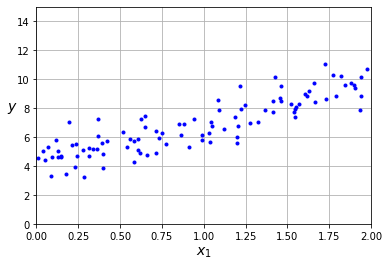

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [13]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_0, theta_1 = theta_best[0][0], theta_best[1][0]
theta_0, theta_1

(4.21509615754675, 2.7701133864384806)

In [14]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

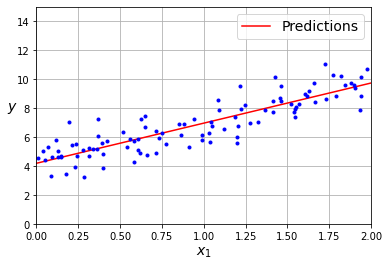

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper right")

plt.show()

## Performing Linear Regression using `Scikit-Learn`


In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [17]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [18]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## The Moore-Penrose inverse

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"). 

The function computes $\widehat{\mathbf{\theta}}$ using $\widehat{\mathbf{\theta}} = \mathbf{X}^{\dagger} \mathbf{y}$, where ${\mathbf{X}}^{\dagger}$ is the pseudoinverse (the Moore-Penrose inverse) of $\mathbf{X}$.

The pseudoinverse is computed using a standard matrix factorization technique caled Singular Value Decomposition (`SVD`). The training set matrix $\mathbf{X}$ is decomposed into the matrix multiplication of three matrices: $$\mathbf{X} =\mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top.$$

See `numpy.linalg.svd()`.

The pseudoinverse is computed as $$\mathbf{X}^\dagger =\mathbf{V} \mathbf{\Sigma}^\dagger \mathbf{U}^\top.$$

For a rectangular diagonal matrix such as 
$\mathbf{\Sigma}$, we get the pseudoinverse by taking the reciprocal of each non-zero element on the diagonal, leaving the zeros in place, and then transposing the matrix. In numerical computation, only elements larger than some small tolerance are taken to be nonzero, and the others are replaced by zeros.

This approach is more efficient than computing the Normal Equation and the pseudoinverse is always defined.


## Computational complexity 

The SVD approach used by Scikit's Learn's `LinearRegression` class has computational complexity of about $O(n^2)$. That means, if you double the number of features, you multiply the computation time by roughly 4. It is very slow when the number of features grows large (e.g., 100,000). On the positive side, it is linear with respect to the number of instances in the training set ($O(m)$), so it can handle large training sets efficiently, provided they can feet in memory.

# Gradient Descent

* An important parameter in Gradient Descent si the size of the steps, determined by the `learning rate` hyperparameter:
   * too smal - long time to converge
   * too high -  you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

* Not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus and all sorts of irregular terrains, making convergence to the minimum difficult. Fortunately, the `MSE` cost function for a Linear Regression model happens to be a convex (concave up) function. That means, there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly (its derivative is Lipschitz continous). That means, Gradient Descent is guaranteed to approach arbitrarly close the global minimum (if you wait long enough and if the learning rate is not too high).
 
* The cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. When using Gradient Descent, you should ensure that all features have a similar scale (e.g using Scikit's Learn's `SandardScaler` class), or elseit will take much longer to converge.



## Batch Gradient Descent 

* Batch Gradient Descent uses the whole batch of training data at every step. It involves calculations over the full training set $X$. As a result, it is terribly slow on very large training sets.

* Gradient Descent scales well with the number of features, training a Linear Regression model when there are hundreds of thousands of features is much faster than using the Normal Equation or Singular Value Decomposition.

* To implement Gradient Descent, you need to compute the gradient of the cost function, $∇MSE(\mathbf{\theta})$. That is, the vector of partial derivatives with respect to each model parameter $\theta_j$:

$$ \frac{\partial}{\partial \theta_j} MSE(\mathbf{\theta}) = \frac{2}{m} \sum_{i=1}^m \left(\mathbf{\theta}^\top \mathbf{x}^{(i)} - y^{(i)}\right) x_j^{(i)}$$

* The gradient vector of the cost function $MSE$ is given by:
$$∇MSE(\mathbf{\theta}) = \begin{bmatrix}
\frac{\partial}{\partial \theta_0} MSE(\mathbf{\theta}) \\
\frac{\partial}{\partial \theta_1} MSE(\mathbf{\theta}) \\
\vdots\\
\frac{\partial}{\partial \theta_n} MSE(\mathbf{\theta})
\end{bmatrix} = \frac{2}{m} \mathbf{X}^\top \left(\mathbf{X}\mathbf{\theta} - \mathbf{y}\right)$$

* Gradient Descent step:

$$ \mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla MSE(\mathbf{\theta})$$

Once you have the gradient vector, which points "uphill" (the direction of fastest increase), just go in the opposite direction. This means subtracting $\nabla MSE(\mathbf{\theta})$ from $\mathbf{\theta}$. We multiply the gradient vector by the learning rate $\eta$, which gives the size of the "downhill" step.




In [19]:
# Batch Gradient Descent
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [20]:
# trained model parameters
theta

array([[4.21509616],
       [2.77011339]])

## Finding a good learning rate

Note that is exactly what the Normal Equation found as well. But what if you had used a different learning rate `eta`?


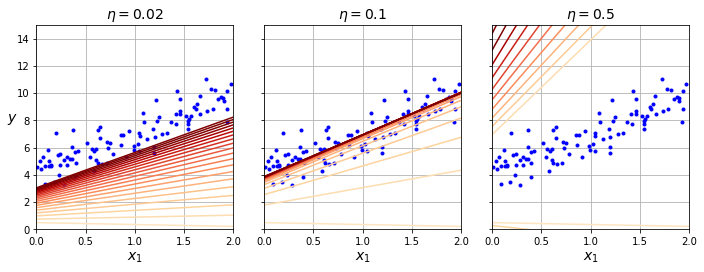

In [21]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

The above figure shows the first 10 steps of Gradient Descent using three different learning rates:

* On the left, the learning rate is **too low**: the algorithm will eventually reach the solution, but it will take a long time. 

* In the middle, the learning rate looks **pretty good**: in just a few iterations, it has already converged to the solution.

*  On the right, the learning rate is **too high**: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

## Setting the number of iterations


* Too low: you will still be far away from the optimal solution when the algorithm stops.

* Too high: you will waste time while the model parameters do not change anymore.

Simple solution: set a very large number of iterations but interrupt the algorithm when the norm of the gradient becomes smaller than a very small number $\epsilon$ (called **tolerance**), because this happens when Gradient Descent has (almost) reached the minimum. 


## Stochastic Gradient Descent

* To make the algorithm much faster, Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that instance.

* Bad: Due to its stochastic (i.e random) nature, it is much less regular than Batch Gradient Descent. Instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. It might end up very close to the minimum, but continue to bounce around. Once the algorithm stops, the final paramter values are good, but not optimal. 

    * One solution: gradually reduce the learning rate. 
    * The function that determines the learning rate at each iteration is called the **learning schedule**.

* Good: Randomness is good to escape local minima. When the cost function is very irregular, this can actually help the algorithm jump out of local minima. Stochastic GD has a better chance at finding the global minimum than Batch GD does.







In [22]:
# Stochastic GD using a simple learning schedule

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0/ (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
      
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [23]:
theta

array([[4.20742938],
       [2.74264448]])

In [24]:
# Linear Regression using Stochastic GD with Scikit-Learn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(eta0=0.1, penalty=None, random_state=42, tol=1e-05)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

* We use the `SGDRegressor` class, which defaults to optimizing the squared error cost function. 

* The above code runs for maximum 1,000 epochs or until the loss drops by less than 0.00001 during one epoch (`max_iter=1000, tol=1e-5`).  

* It starts with a learning rate of 0.1 (`eta0=0.1`), using the default learning schedule (different from the preceding one). Lastly, it does not use any regularization (`penalty=None`).

## Mini-Batch Gradient Descent

*  At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

# Comparison of algorithms for Linear Regression

| Algorithm |  Large $m$ | Large $n$|Hyperparams | Scaling required | Scikit-Learn |
| --- | ----------- |-----------|-------|-------|-------|
| Normal Equation | Fast | Slow | 0 | No | N/A |
| SVD | Fast | Slow | 0 | No | LinearRegression |
| Batch GD| Slow | Fast | 2 | Yes | SGDRegressor |
| Stochastic GD| Fast | Fast | $\geq 2$ | Yes | SGDRegressor |
| Mini-Batch GD| Fast | Fast | $\geq 2$ | Yes | SGDRegressor |

NOTE.  There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way.

# Polynomial Regression

* Add powers of each feature as new features, then train a linear model on this extended set of features. 

* In the following example, we use Scikit-Learn's `PolynomialFeatures` class with `degree=2` to transform our training data, adding the square of each feature in the training set as a new feature (in this case there is just one feature).

* Note that if there were two features $a$ and $b$, `PolynomialFeatures` with `degree=3` would not only add the features $a^2, a^3, b^2$, and $b^3$, but also the combinations $ab, a^2b,$ and $ab^2$.

* `PolynomialFeatures` with `degree=d` transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d!n!}$ features.

In [26]:
# generate some nonlinear data
np.random.seed(42)
m = 100
X = 6 *  np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

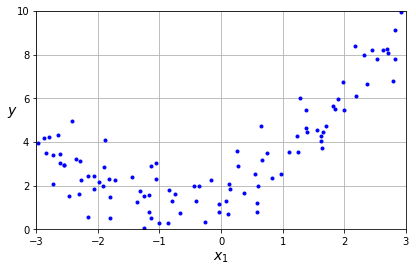

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_poly contains the original feature of X and the square of this feature
X_poly = poly_features.fit_transform(X)

In [29]:
# fit a LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The model estimates $$\widehat{y} = 0.56x_1^2 + 0.93 x_1 + 1.78$$
when the original function used to generate the data was 
$$y = 0.5 x_1^2 + 1.0 x_1 + 2 + \text{ Gaussian noise}.$$

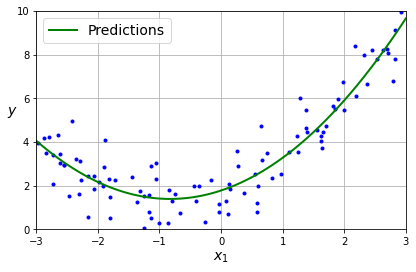

In [30]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

# Learning Curves

* These are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training set iteration). To generate the plots, train the model several times on different sized subsets of the training set.



##  Underfitting Example

In [31]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

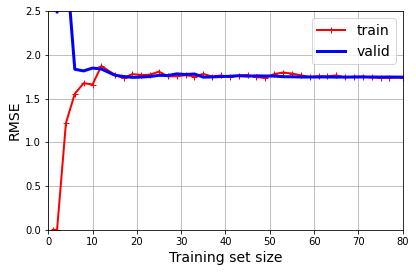

In [32]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

Interpretation of the above plot: the model is underfitting. Both curves have reached a plateau; they are close and fairly high.

## Overfitting Example

Let's look at the learning curves of a 10th-degree polynomial model on the same data as in the previous example.

In [33]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

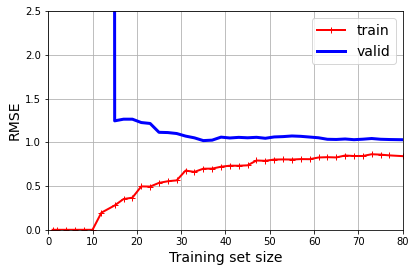

In [34]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

Interpretation of the above plot: 
* The error on the training data is much lower than with the Linear Regression model.
* There is a gap between the curves. That means that the model performs significally better on the training data than on the validation data, which indicates the model is overfitting. 

One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.




# The Bias/Variance Trade-off

Increasing a model complexity (such as using a high-degree polynomial model) will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance.



# Regularized Linear Models

A good way to reduce overfitting is to regularize the model: the fewer degrees of freedom it has, the harder it is to overfit the data.

For a linear model, regularization is typically achieved by constraining the weights of the model. 

## Ridge Regression 

* Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\alpha \sum_{i=1}^n \theta_i^2$ is added to the cost function **during training**.

* Note that the bias term $\theta_0$ si not regularized (the sum starts at $i=1$, not 0).

* Ridge regression cost function:
$$J(\mathbb{\theta}) = MSE(\mathbb{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2$$

* This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

* If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through data's mean.

* If we define the $\mathbf{w}$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is equal to $\frac{1}{2}(\lVert \mathbf{w}\rVert _2)^2$, where $\lVert \mathbf{w}\rVert _2$ represents the $l_2$ norm of the weight vector. Then the gradient of the cost function is given by:
$$\nabla J(\mathbf{\theta}) = \nabla MSE(\mathbb{\theta}) + \alpha \lVert \mathbf{w}\rVert _2$$

In [35]:
# generate a very small and noisy linear dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

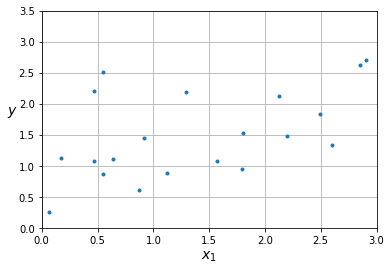

In [36]:
# a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [37]:
# Ridge Regression with Scikit-Learn using a closed-form solution
# uses a matrix factorization technique by André-Louis Cholesky

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [38]:
# Ridge Regression using Stochastic Gradient Descent

sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [39]:
# Ridge Regression using Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

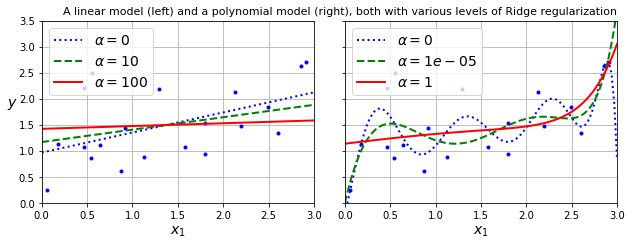

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.title("A linear model (left) and a polynomial model (right), both with various levels of Ridge regularization", fontsize=11, loc="right")
plt.show()

## Lasso Regression

* Least Absolute Shrinkage and Selection Operator Regression is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_1$ norm of the weight vector instead of half the square of the $l_2$ norm:

$$J(\mathbb{\theta}) = MSE(\mathbb{\theta}) + \alpha \sum_{i=1}^n \vert\theta_i \rvert$$

* Important characteristic: it tends to eliminate the weights of the least important features (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

* The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i=1,2,\ldots, n$), but Gradient still works fine if you use a subgradient vector $\mathbf{g}$  instead when $\theta_i =0$. Think of a subgradient vector at a nondifferentiable point as an intermediate vector between the gradient vectors around that point.

* Subgradient vector equation you can use for Gradient Descent with the Lasso cost function:

$$g(\mathbf{\theta}, J) = \nabla_{\mathbf{\theta}} MSE(\mathbf{\theta}) + \alpha \begin{bmatrix}
sign(\theta_1) \\
sign(\theta_2) \\
\vdots\\
sign(\theta_n)
\end{bmatrix} $$

where $$sign(\theta_i) = \begin{cases} - 1 & \text{if } \theta_i < 0\\
0 & \text{if } \theta_i = 0\\
+ 1 & \text{if } \theta_i > 0\\
 \end{cases}$$


In [41]:
#  Scikit-Learn example using Lasso the class
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])


array([1.53788174])

## Elastic Net

* Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio $r$:

  * when $r = 0$, Elastic Net is equivalent to Ridge Regression,
  * when r = 1, it is equivalent to Lasso Regression.

* Elastic Net cost function:

$$J(\mathbb{\theta}) = MSE(\mathbb{\theta}) + \alpha r \sum_{i=1}^n \vert\theta_i \rvert + \alpha \frac{1-r}{2} \sum_{i=1}^n \theta_i^2$$




In [42]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? 

* It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. 

* Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed.

* In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

# Early Stopping

* A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

* See a basic implementation of early stopping at https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb.

# Logistic Regression

* Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class:
   * If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labelled `1`), 
   * and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled `0`). 
   
   This makes it a **binary classifier**.

* A Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. 

* The logistic, denoted $\sigma$, is a sigmoid function that outputs a number between 0 and 1:

$$ \sigma(t)= \frac{1}{1+exp(-t)}$$

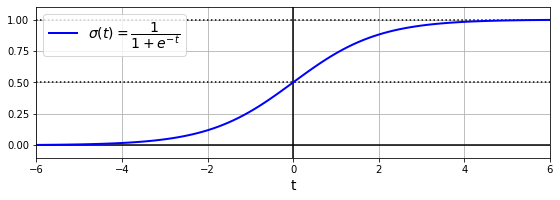

In [43]:
# generate plot of the logistic function

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

* Logistic Regression model estimated probability (vectorized form):

$$ \widehat{p} = h_{\mathbf{\theta}} (\mathbf{x}) = \sigma (\mathbf{x}^\top \mathbf{\theta})$$

* Once the Logistic Regression model has estimated the probability $\widehat{p} = h_{\mathbf{\theta}} (\mathbf{x})$ that an instance $\mathbf{x}$ belongs to the positive class, it can make its prediction $\widehat{y}$ easily:

$$\widehat{y}= \begin{cases} 0 & \text{if } \widehat{p} < 0.5\\
1 & \text{if } \widehat{p} \geq 0.5
\end{cases}$$

* Note that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t)\geq 0.5$ when $t\geq 0$, so a Logistic Regression model predicts:
   *  `1` if $\mathbf{x}^\top \mathbf{\theta}$ is positive,
   *  `0` if $\mathbf{x}^\top \mathbf{\theta}$ is negative.

* Note that $$ \sigma(t)= \frac{1}{1+exp(-t)} = p \Leftrightarrow 1+exp(-t) = \frac{1}{p}$$ $$ \Leftrightarrow exp(-t) = \frac{1}{p} - 1 \Leftrightarrow -t = \log\left(\frac{1-p}{p}\right)$$   
$$ \Leftrightarrow t = -\log\left(\frac{1-p}{p}\right)=\log\left(\frac{1-p}{p}\right)^{-1}=\log\left(\frac{p}{1-p}\right)$$

* The logit function $$\text{logit}(p) = \log\left(\frac{p}{1-p}\right)=t$$
is the inverse of the logistic function.

* The logit is also called the *log-odds*, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

## Cost Function

* Cost function of a single training instance:

$$c(\mathbf{\theta}) = \begin{cases} -\log(\widehat{p})& \text{if } y = 1\\
 -\log(1-\widehat{p})& \text{if } y = 0\\ \end{cases}$$

 * Note that $-\log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance.

 * On the other hand, $-\log(t)$ is close to 0 when $t$ is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance (`0` class) or close to 1 for a positive instance (`1` class).

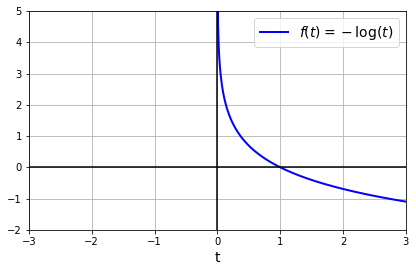

In [139]:
# generate plot of the function f(t)=-log(t)

t = np.arange(0.000001,10, 0.01)
y = -np.log(t)

plt.plot(t, y, "b-", linewidth=2, label=r"$f(t)=-\log(t)$")
plt.xlabel("t")
plt.legend(loc="upper right")
plt.axis([-3, 3, -2, 5])
plt.grid()

# Highlighting axis at x=0 and y=0
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
save_fig("logistic_function_plot")
plt.show()

* Logistic Regression cost function (log loss):

   The cost function over the whole training set is the average cost over all training instances.

$$J(\mathbf{\theta}) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)}\log\left(\widehat{p}^{(i)}\right) +  \left(1-y^{(i)}\right)\log\left(1-\widehat{p}^{(i)}\right)\right] $$

   * This cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is bor too large and you wait long enough).

   * Logistic cost function partial derivatives:
     
     For each instance it computes the prediction error and multiplies it by the $j$-th feature value, and then it computes the average over all training instances.

   $$\frac{\partial}{\partial \theta_j} J(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^m \left(\sigma\left(\mathbf{\theta}^\top \mathbf{x}^{(i)}\right) - y^{(i)} \right) x_j^{(i)}$$ 


 


## Regularization

* Just like the other linear models, Logistic Regression models can be regularized using $l_1$ or $l_2$ penalties. Scikit-Learn actually adds an $l_2$ penalty by default.

* The hyperparameter controlling the regularization strength of a Scikit-Learn
`LogisticRegression` model is not `alpha` (as in other linear models), but its inverse: $C$. The higher the value of $C$, the less the model is regularized.

## Example using the iris dataset

* The iris dataset is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three species: *Iris setosa*, *Iris versicolor*, and *Iris virginica*.

* In this example we build a classifier to detect the *Iris virginica* type based only on the petal width feature.

In [146]:
# load the data
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [147]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [149]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [150]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [151]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [152]:
# build a classifier to detect the Iris virginica type
# based only on the petal width feature
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

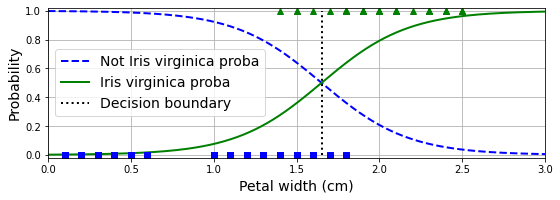

In [157]:
# Let’s look at the model’s estimated probabilities for flowers
# with petal widths varying from 0 cm to 3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3)) 
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

Observations:
 * The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. 

 * Above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class), while below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class). In between these extremes, the classifier is unsure.

 * If you ask it to predict the
class (using the `predict()` method rather than the `predict_proba()`
method), it will return whichever class is the most likely. 

* There is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident).

In [158]:
decision_boundary

1.6516516516516517

In [159]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [172]:
# build a classifier to detect the Iris virginica type
# based on the petal width and petal length features

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

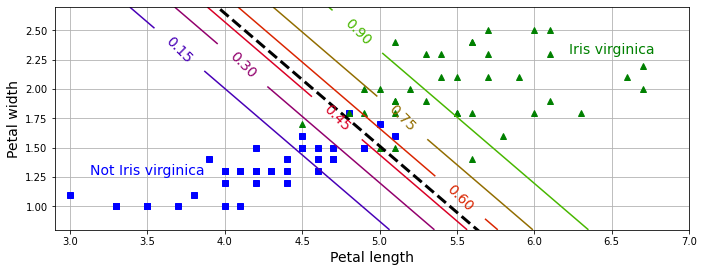

In [175]:
# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

# Reference

*Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, by Aurélien Géron.